In [1]:
import requests
from ast import literal_eval
str_dict="{'a':3,'b':5}"
literal_eval(str_dict)
import pandas as pd
import re, os
import matplotlib.pyplot as plt

In [2]:
#os.getcwd()='/'.('EU_painters.txt')
painter=pd.read_csv('EU_painters.txt', names=['painter'])
actor=pd.read_csv('US_suppression.txt', names=['actor'])
p_names=[painter['painter'][i] for i in range(0,len(painter))]
a_names=[actor['actor'][j] for j in range(0,len(actor))]
a_names

['John Howard Lawson',
 'Albert Maltz',
 'Dalton Trumbo',
 'Alvah Bessie',
 'Edward Dmytryk',
 'Herbert Biberman',
 'Lester Cole',
 'Ring Lardner Jr.',
 'Samuel Ornitz',
 'Adrian Scott']

In [40]:
corpora=dict(eng_2019=26, ger_2019=31)
def GoogleNgrams(A,B=1900, C=1970,D='eng_2019'):
    search=dict(content=A, year_start=B, year_end=C, corpus=corpora[D])
    a=requests.get('http://books.google.com/ngrams/graph', params=search)
    b=literal_eval(re.findall('ngrams.data = (.*?);\\n',a.text)[0])
    c=pd.DataFrame({i['ngram']: i['timeseries'] for i in b},
                  index=range(search['year_start'],
                             search['year_end']+1))
    return(c)

Text(0.5, 1.0, 'US painters')

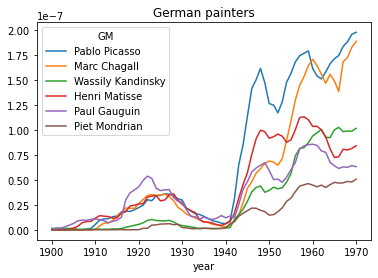

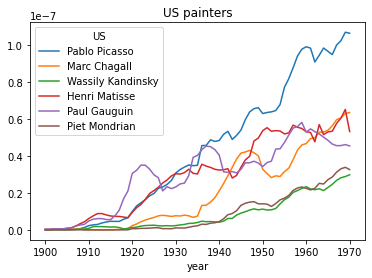

In [247]:
gm=GoogleNgrams('Pablo Picasso,Marc Chagall,Wassily Kandinsky,Henri Matisse,Paul Gauguin,Piet Mondrian',D='ger_2019')
us=GoogleNgrams('Pablo Picasso,Marc Chagall,Wassily Kandinsky,Henri Matisse,Paul Gauguin,Piet Mondrian', D='eng_2019')

gm.columns.name='GM'
gm.index.name='year'
us.columns.name='US'
us.index.name='year'
gm.plot()
plt.title('German painters')

us.plot()
plt.title('US painters')

In [5]:
gm.head()

GM,Pablo Picasso,Marc Chagall,Wassily Kandinsky,Henri Matisse,Paul Gauguin,Piet Mondrian
year,,,,,,
1900,2.875549e-10,1.479207e-10,1.593368e-09,1.396341e-10,2.626670e-10,0.0
1901,2.300439e-10,1.183366e-10,1.464251e-09,1.117073e-10,1.916148e-09,0.0
1902,1.917033e-10,9.861383e-11,1.607033e-09,9.308943e-11,1.751519e-09,0.0
1903,1.643171e-10,8.452614e-11,1.438754e-09,2.636819e-10,2.972430e-09,0.0
1904,7.979094e-11,0.000000e+00,1.499623e-09,5.071596e-10,4.737644e-09,0.0


<AxesSubplot:xlabel='year'>

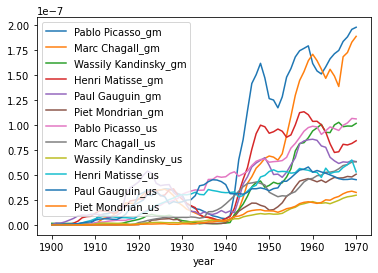

In [45]:
painters=pd.merge(gm,us, left_index=True, right_index=True, suffixes=['_gm','_us'])
painters.plot()


<AxesSubplot:xlabel='year'>

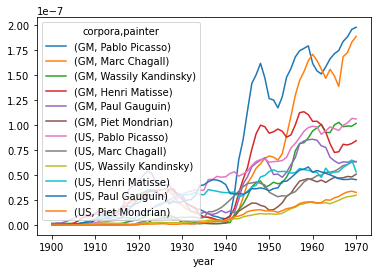

In [57]:
painters.columns=pd.MultiIndex.from_product([['GM','US'],['Pablo Picasso','Marc Chagall','Wassily Kandinsky','Henri Matisse','Paul Gauguin','Piet Mondrian']], 
                           names=['corpora','painter'])
painters.plot()

Text(0.5, 1.0, 'GM&US painters')

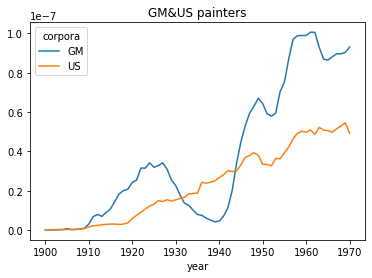

In [8]:
painters.groupby(level='corpora',axis=1).median().plot() #독일, 미국 나눠서
plt.title('GM&US painters')

In [9]:
painters.head()

corpora            GM                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
year                                                                  
1900     2.875549e-10  1.479207e-10      1.593368e-09  1.396341e-10   
1901     2.300439e-10  1.183366e-10      1.464251e-09  1.117073e-10   
1902     1.917033e-10  9.861383e-11      1.607033e-09  9.308943e-11   
1903     1.643171e-10  8.452614e-11      1.438754e-09  2.636819e-10   
1904     7.979094e-11  0.000000e+00      1.499623e-09  5.071596e-10   

corpora                                        US                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
year                                                              
1900     2.626670e-10           0.0  2.453135e-10  1.226279e-10   
1901     1.916148e-09           0.0  1.962508e-10  9.810233e-11   
1902     1.751519e-09           0.0  4.115246e-10  5.967920e-10   
1903     2.972430e-09           0.0  3.678643e-10  5.115360e-10   
1904     4.737644e-09           0.0  2.920831e-10  4.585931e-10   

corpora                                                              
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian  
year                                                                 
1900         3.088335e-11  3.036890e-10  2.711678e-10  0.000000e+00  
1901         2.470668e-11  2.429512e-10  3.308794e-10  0.000000e+00  
1902         2.058890e-11  3.550638e-10  5.618662e-10  3.815111e-11  
1903         1.764763e-11  3.194693e-10  5.572443e-10  3.270095e-11  
1904         3.010464e-11  3.692974e-10  5.847536e-10  3.270095e-11

In [69]:
painters['period']=[str(i)[:-1]+'0'
                   for i in painters.index]
painters.head()
painters.groupby(by=painters.period, axis=0).agg('median').head()

corpora            GM                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
period                                                                
1900     1.780102e-10  9.156999e-11      1.451503e-09  1.128765e-09   
1910     1.358316e-08  1.137063e-08      9.873081e-10  1.403974e-08   
1920     3.264295e-08  3.394428e-08      9.054490e-09  3.145123e-08   
1930     1.450737e-08  9.086802e-09      1.571462e-09  9.063027e-09   
1940     9.982220e-08  3.454613e-08      2.474889e-08  5.153855e-08   

corpora                                        US                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
period                                                            
1900     5.629232e-09  0.000000e+00  3.097178e-10  4.484191e-10   
1910     1.060731e-08  1.775584e-10  4.432543e-09  4.002589e-11   
1920     4.107480e-08  5.139714e-09  1.906370e-08  6.414474e-09   
1930     1.306203e-08  1.430501e-09  3.498624e-08  7.811362e-09   
1940     4.458903e-08  1.751519e-08  5.358133e-08  3.915192e-08   

corpora                                                              
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian  
period                                                               
1900         3.049400e-11  5.633328e-10  7.945899e-10  3.270095e-11  
1910         1.582483e-09  7.424314e-09  6.103274e-09  1.430488e-11  
1920         2.213583e-09  2.048965e-08  3.013263e-08  7.668478e-10  
1930         3.801588e-09  3.184977e-08  3.971132e-08  2.090768e-09  
1940         8.563703e-09  3.345521e-08  3.439738e-08  1.182609e-08

Text(0.5, 1.0, 'GM&US painters')

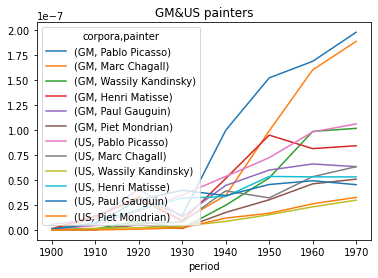

In [64]:
painters.groupby(by=painters.period, axis=0).median().plot()
plt.title('GM&US painters')

Text(0.5, 1.0, 'GM&US painters')

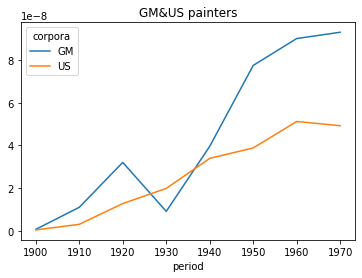

In [65]:
painters.groupby(painters['period'],axis=0).median().groupby(level='corpora',axis=1).median().plot()
plt.title('GM&US painters')

In [68]:
painters.groupby(by=painters.period, axis=0).agg('median').head()

corpora            GM                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
period                                                                
1900     1.780102e-10  9.156999e-11      1.451503e-09  1.128765e-09   
1910     1.358316e-08  1.137063e-08      9.873081e-10  1.403974e-08   
1920     3.264295e-08  3.394428e-08      9.054490e-09  3.145123e-08   
1930     1.450737e-08  9.086802e-09      1.571462e-09  9.063027e-09   
1940     9.982220e-08  3.454613e-08      2.474889e-08  5.153855e-08   

corpora                                        US                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
period                                                            
1900     5.629232e-09  0.000000e+00  3.097178e-10  4.484191e-10   
1910     1.060731e-08  1.775584e-10  4.432543e-09  4.002589e-11   
1920     4.107480e-08  5.139714e-09  1.906370e-08  6.414474e-09   
1930     1.306203e-08  1.430501e-09  3.498624e-08  7.811362e-09   
1940     4.458903e-08  1.751519e-08  5.358133e-08  3.915192e-08   

corpora                                                              
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian  
period                                                               
1900         3.049400e-11  5.633328e-10  7.945899e-10  3.270095e-11  
1910         1.582483e-09  7.424314e-09  6.103274e-09  1.430488e-11  
1920         2.213583e-09  2.048965e-08  3.013263e-08  7.668478e-10  
1930         3.801588e-09  3.184977e-08  3.971132e-08  2.090768e-09  
1940         8.563703e-09  3.345521e-08  3.439738e-08  1.182609e-08

Text(0.5, 1.0, 'GM&US painters')

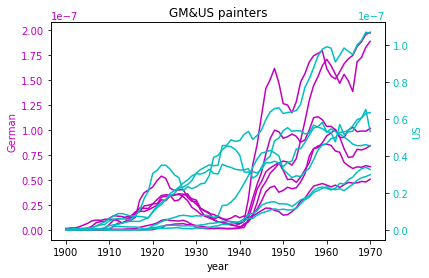

In [14]:
fig, ax1=plt.subplots()
ax1.set_xlabel('year')
ax1.set_ylabel('German', color='m')
ax1.plot(gm, color='m')
ax1.tick_params(axis='y', labelcolor='m')

ax2=ax1.twinx()
ax2.set_ylabel('US', color='c')
ax2.plot(us, color='c')
ax2.tick_params(axis='y',labelcolor='c')
plt.title('GM&US painters')

(array([[<AxesSubplot:title={'center':'Pablo Picasso'}>,
         <AxesSubplot:title={'center':'Marc Chagall'}>],
        [<AxesSubplot:title={'center':'Wassily Kandinsky'}>,
         <AxesSubplot:title={'center':'Henri Matisse'}>],
        [<AxesSubplot:title={'center':'Paul Gauguin'}>,
         <AxesSubplot:title={'center':'Piet Mondrian'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Pablo Picasso'}>,
         <AxesSubplot:title={'center':'Marc Chagall'}>],
        [<AxesSubplot:title={'center':'Wassily Kandinsky'}>,
         <AxesSubplot:title={'center':'Henri Matisse'}>],
        [<AxesSubplot:title={'center':'Paul Gauguin'}>,
         <AxesSubplot:title={'center':'Piet Mondrian'}>]], dtype=object))

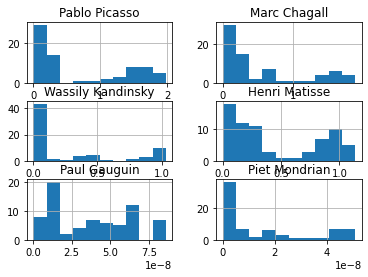

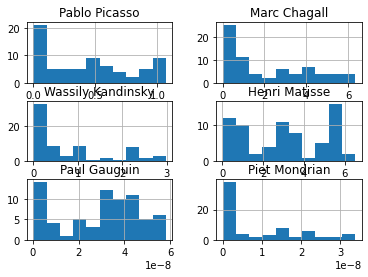

In [70]:
gm.hist(), us.hist()

Text(0.5, 1.0, 'German painters')

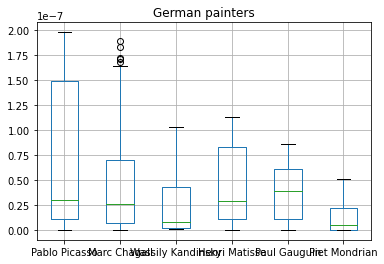

In [73]:
gm.boxplot()
plt.title('German painters')

Text(0.5, 1.0, 'US painters')

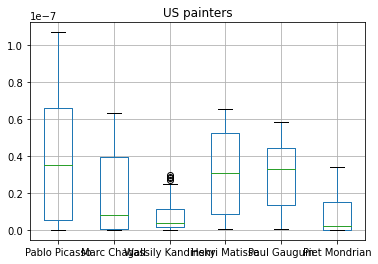

In [72]:
us.boxplot() 
plt.title('US painters')

In [243]:
import math
gm['period']=[str(i)[:-1]+'0'
                   for i in painters.index]
gm.head()
bindo=gm.apply('sum', axis=1)
for i in range(0,len(bindo)):
    n=re.findall('[\d]{1}',str(bindo.iloc[i]))[0]
    bindo.iloc[i]=int(n)
#new=pd.Series({'빈도':})

bindo_df=pd.DataFrame(bindo,index=bindo.index)
bindo_df.rename(columns={0:'빈도'},inplace=True)
#bindo_df['0']=['빈도']
bindo_df['period']=[str(i)[:-1]+'0'
                 for i in bindo.index]
new=bindo_df.groupby(by=bindo_df.period, axis=0).median()
#bindo_df.columns.levels
#new.plot(kind='pie',subplots=True)
def neww :
    b=[]
    for i in range(0,len(new)):
        b.append(int(new.iloc[i][0]))
#int(new.iloc[0][0])
neww(new)

SyntaxError: invalid syntax (<ipython-input-243-bee41235d11d>, line 19)

In [230]:
re.findall('[\d]{1}',str(bindo.iloc[0]))[0]

'2'

array([[<AxesSubplot:title={'center':'gm'}>,
        <AxesSubplot:title={'center':'us'}>]], dtype=object)

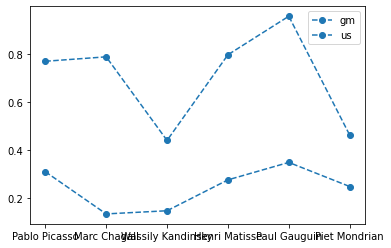

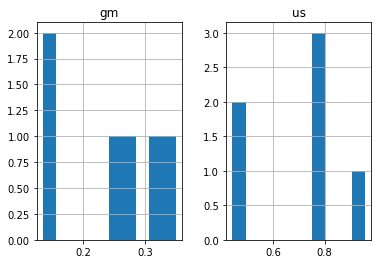

In [249]:
#억압지수
gm1=gm.loc[1933:1945].mean()
gm2=(gm.loc[1925:1933].mean()+gm.loc[1955:1965].mean())/2
suppression=gm1/gm2
us1=us.loc[1933:1945].mean()
us2=(us.loc[1925:1933].mean()+us.loc[1955:1965].mean())/2
suppression_us=us1/us2

suppression,suppression_us
sup=pd.DataFrame({'gm':suppression, 'us':suppression_us})
sup.plot(color='C0',linestyle='--' ,marker='o')
sup.hist()

(<AxesSubplot:>, <AxesSubplot:>)

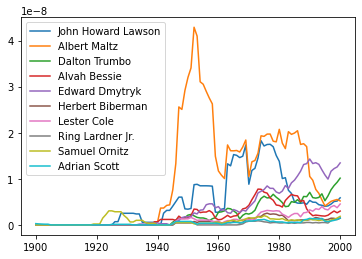

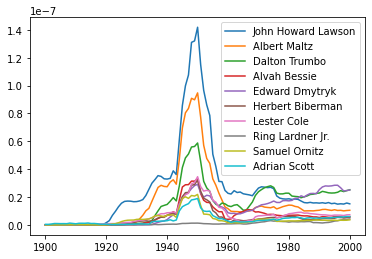

In [19]:
#미국 
gm_act=GoogleNgrams('John Howard Lawson, Albert Maltz, Dalton Trumbo, Alvah Bessie, Edward Dmytryk, Herbert Biberman, Lester Cole, Ring Lardner Jr., Samuel Ornitz, Adrian Scott',
                B=1900,C=2000, D='ger_2019')
us_act=GoogleNgrams('John Howard Lawson, Albert Maltz, Dalton Trumbo, Alvah Bessie, Edward Dmytryk, Herbert Biberman, Lester Cole, Ring Lardner Jr., Samuel Ornitz, Adrian Scott',
                B=1900,C=2000, D='eng_2019')

gm_act.plot(), us_act.plot()


No handles with labels found to put in legend.


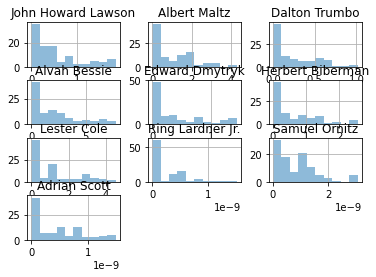

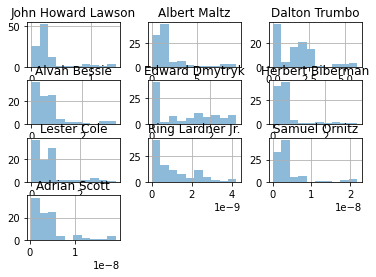

In [271]:
gm_act.hist(alpha=0.5, label='GM')
us_act.hist(alpha=0.5, label='US')
plt.legend()

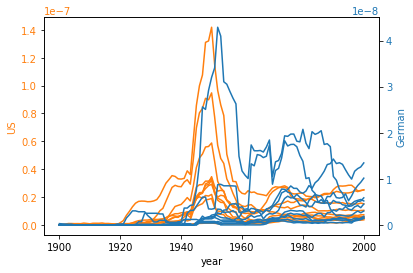

In [20]:
fig, ax1=plt.subplots()
ax1.set_xlabel('year')
ax1.set_ylabel('US', color='C1')
ax1.plot(us_act, color='C1')
ax1.tick_params(axis='y', labelcolor='C1')

ax2=ax1.twinx()
ax2.set_ylabel('German', color='C0')
ax2.plot(gm_act, color='C0')
ax2.tick_params(axis='y',labelcolor='C0')

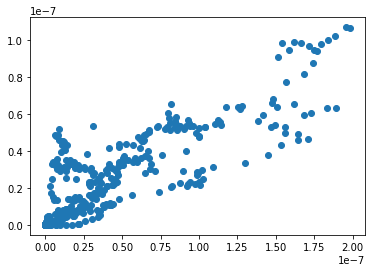

In [76]:
plt.scatter(painters['GM'], painters['US'])

In [199]:
german=pd.DataFrame(gm['painter'].pct_change()[1:])
german.columns=['ChangeRate']
german['Decade']=[str(i)[:-1]+'0' for i in gm.index]
german

KeyError: 'painter'

<AxesSubplot:xlabel='year'>

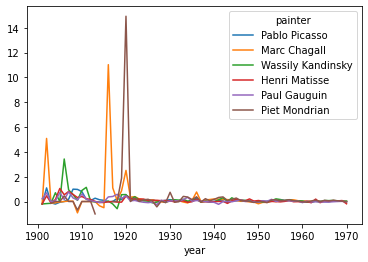

In [22]:
painters['US'].pct_change().plot()


<AxesSubplot:ylabel='year'>

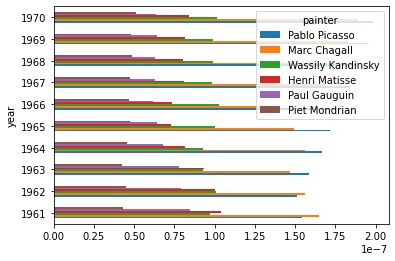

In [23]:
painters['GM'][-10:].plot.barh()

In [24]:
painters.groupby(level='corpora',axis=1).median().plot.barh()

DataError: No numeric types to aggregate

Text(0.5, 1.0, 'GM&US painters')

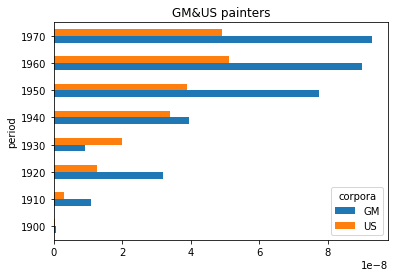

In [25]:
painters.groupby(painters['period'],axis=0).median().groupby(level='corpora',axis=1).median().plot.barh()
plt.title('GM&US painters')

Text(0.5, 1.0, 'GM&US painters')

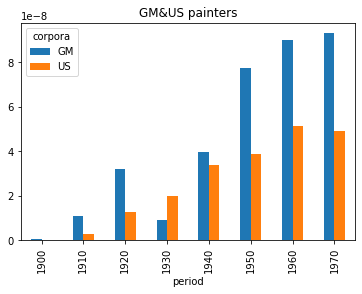

In [71]:
painters.groupby(painters['period'],axis=0).median().groupby(level='corpora',axis=1).median().plot.bar()
plt.title('GM&US painters')

In [222]:
aa='3'
int(aa)

3